### **"Comparative Analysis of Economic and Social Indicators in Chile (1990-Present): Verification of Public Narratives in an International Context"**

**Objective of the Study**

This work arises from the need to clarify and analyze economic and social indicators frequently cited by different ideological sectors in Chile. The main purpose is to verify the validity of these data, contextualize them (through international comparisons), and substantiate their interpretation, thus avoiding biased use or even the spread of fake news.

**Sources and Methodology**

Data will be obtained from:
1. International organizations: the World Bank, the International Monetary Fund (IMF), and other similar institutions, to place Chile in a global context.
2. National institutions: the Central Bank of Chile, the National Institute of Statistics (INE), among others, to delve deeper into country-specific statistics.
The analysis period spans from the 1990s to the present, allowing for the assessment of long-term trends.


**Critical Approach**

This analysis seeks to bring rigor to the public debate, differentiating between ideological perceptions and statistical reality.


In [45]:
#!pip install squarify

In [46]:
#Libraries to use

import pandas as pd
from pandas_datareader import wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch
import warnings
import squarify

A Python function is created to query data from the World Bank. The parameters are as follows:
indicators: 

- Indicator codes (e.g., "NY.GDP.MKTP.CD" for GDP).

- countries: Country codes (e.g., "CL" for Chile, "US" for the United States).

- start and end: Start and end years of the period (e.g., 2000, 2020).

These return a Pandas DataFrame with the requested data.

In [48]:
def descargar_datos_wb(indicadores, paises, inicio, fin):      
    dfs = []
    
    for nombre, indicador in indicadores.items():
        try:
            # Descargar datos para el indicador actual
            df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)            
            df.reset_index(inplace=True)
            df['indicador'] = nombre  # Agregar columna con nombre del indicador
            df.rename(columns={indicador: 'valor'}, inplace=True)            
            dfs.append(df)            
        except Exception as e:
            print(f"Error al descargar el indicador {nombre} ({indicador}): {str(e)}")
    
    # Combinar todos los DataFrames
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        return df_final
    else:
        return pd.DataFrame()

print(type(descargar_datos_wb))

<class 'function'>


In [49]:
#Países en el listado del Banco Mundial
countries = wb.get_countries()
print(type(countries))
countries.head(1)

<class 'pandas.core.frame.DataFrame'>


,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167


In [50]:
# Contar países por regiones
conteo_paises_region = countries['region'].value_counts().reset_index()
conteo_paises_region.columns = ['region', 'número_de_países']
print(conteo_paises_region)

                       region  número_de_países
0                  Aggregates                79
1       Europe & Central Asia                58
2         Sub-Saharan Africa                 48
3  Latin America & Caribbean                 42
4         East Asia & Pacific                37
5  Middle East & North Africa                21
6                  South Asia                 8
7               North America                 3


In [51]:
# Contar países por su clasificación
conteo_paises_clasificacion = countries['incomeLevel'].value_counts().reset_index()
print(conteo_paises_clasificacion)

           incomeLevel  count
0          High income     85
1           Aggregates     79
2  Upper middle income     54
3  Lower middle income     51
4           Low income     26
5       Not classified      1


**Countries List**

Here, the country or countries used in the analysis are detailed. Lists will be created as the analysis progresses and there is a need to review specific groups of countries, etc.

In [53]:
#Primer grupo. Países que son parte de la OCDE

#Lista de países (actualizada a 2023). 
oecd_countries = [
   'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA']

#Segundo grupo. Países de América Central y del Sur

central_south_america = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN', 'PRI']

In [54]:
type(central_south_america)

list

**The growth of the Gross Domestic Product (GDP) in Chile**

Who has not heard in the debates that Chile is far from the economic growth achieved during the 1990s, those first years of the Concertación. Academics and political agree that inherited poverty bags would hardly have been overcome without the sustained boom of that "golden age."

The economic opening after the military dictatorship evokes in the citizen memory the irruption of the shopping centers - the large malls - that displaced the traditional "Persian" and "snails" of the eighties. This period without a doubt, the beginning of a growing consumption by families, in search of an improvement in their quality of material life.

To analyze GDP, the first step is to define which indicator to use. To do this, a World Bank database will be downloaded that includes all relevant GDP variables.

In [56]:
# Buscar indicadores relacionados con "gdp"
resultados = wb.search('gdp')

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar las primeras filas y también generar un archivo excel por una sola vez
#df_resultados.to_excel('GPD.xlsx')
df_resultados.head(1)

,id,name,unit,source,sourceNote,sourceOrganization,topics
688,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth


The selection of the **indicator NY.GDP.MKTP.KD.ZG** refers to the Annual percentage growth rate of Gross Domestic Product (GDP) at market prices in constant local currency. The data, expressed as a percentage, will initiate an introductory research process that will strengthen the analysis due to the correct and timely choice of indicators, which will reflect the political and social economy of post-dictatorship Chile.



**Comparative GDP Analysis: Chile and OECD Countries**

This study examines the evolution of Gross Domestic Product (GDP) in OECD member countries and its comparison with Chile, which joined the organization in 2010. The analysis covers two key periods:

The initial expansion years (1990-1993): Corresponds to the first five years following Chile's return to democracy.

The post-pandemic phase (2021-2023): Reflects the recent economic recovery.

It should be noted that the analysis considers current members of the organization as "OECD countries," regardless of their accession date during the periods studied.


In [59]:
# Crecimiento del PIB y los países del OCDE
indicadores = {'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG'}

paises = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI',
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC',
    'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 
    'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL',
    'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 
    'SWE', 'CHE', 'TUR', 'GBR', 'USA']

df_pib = descargar_datos_wb(indicadores, paises, '1990', '2023')
#df_pib.to_excel('pib.xlsx') #Exportar archivo para revisar la consistencia de los datos.
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1292 non-null   object 
 1   year       1292 non-null   object 
 2   valor      1285 non-null   float64
 3   indicador  1292 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.5+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


In [60]:
# Preparación de los datos para los gráficos

# Convertir 'year' a numérico (si aún no lo está)
df_pib['year'] = pd.to_numeric(df_pib['year'], errors='coerce')

# Filtrar y sumar los valores para los años 1990-1993
df_90 = df_pib[(df_pib['year'] >= 1990) & (df_pib['year'] <= 1993)].groupby('country')['valor'].sum().reset_index()
df_90 = df_90.rename(columns={'valor': 'sum_1990_1993'})  # Renombrar columna

# Filtrar y sumar los valores para los años 2020-2023
df_2020 = df_pib[(df_pib['year'] >= 2020) & (df_pib['year'] <= 2023)].groupby('country')['valor'].sum().reset_index()
df_2020 = df_2020.rename(columns={'valor': 'sum_2020_2023'})  # Renombrar columnas

In [61]:
#Al dataframe countries, a la variable 'name' se le renombra a 'country' 

countries.rename(columns={'name': 'country'}, inplace=True)
countries.head(2)

,iso3c,iso2c,country,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [62]:
# Hacer un left join para unir los DF con el DF countries
df_90_completo = pd.merge(df_90,
    countries[['country', 'region', 'incomeLevel']],  # Seleccionar las columnas que necesitas
    on='country',  # Columna común para unir
    how='left')     # Mantener todas las filas del dataframe izquierdo

# Hacer un left join para mantener todas las filas
df_2020_completo = pd.merge(df_2020, countries[['country', 'region', 'incomeLevel']], on='country', how='left') 

df_2020_completo.head(1)

,country,sum_2020_2023,region,incomeLevel
0,Australia,9.675955,East Asia & Pacific,High income


**Bar Chart**

The graphs describe two periods related to GDP growth. The first covers the 1990s, from 1990 to 1993 and the second covers the years 2020 to 2023.

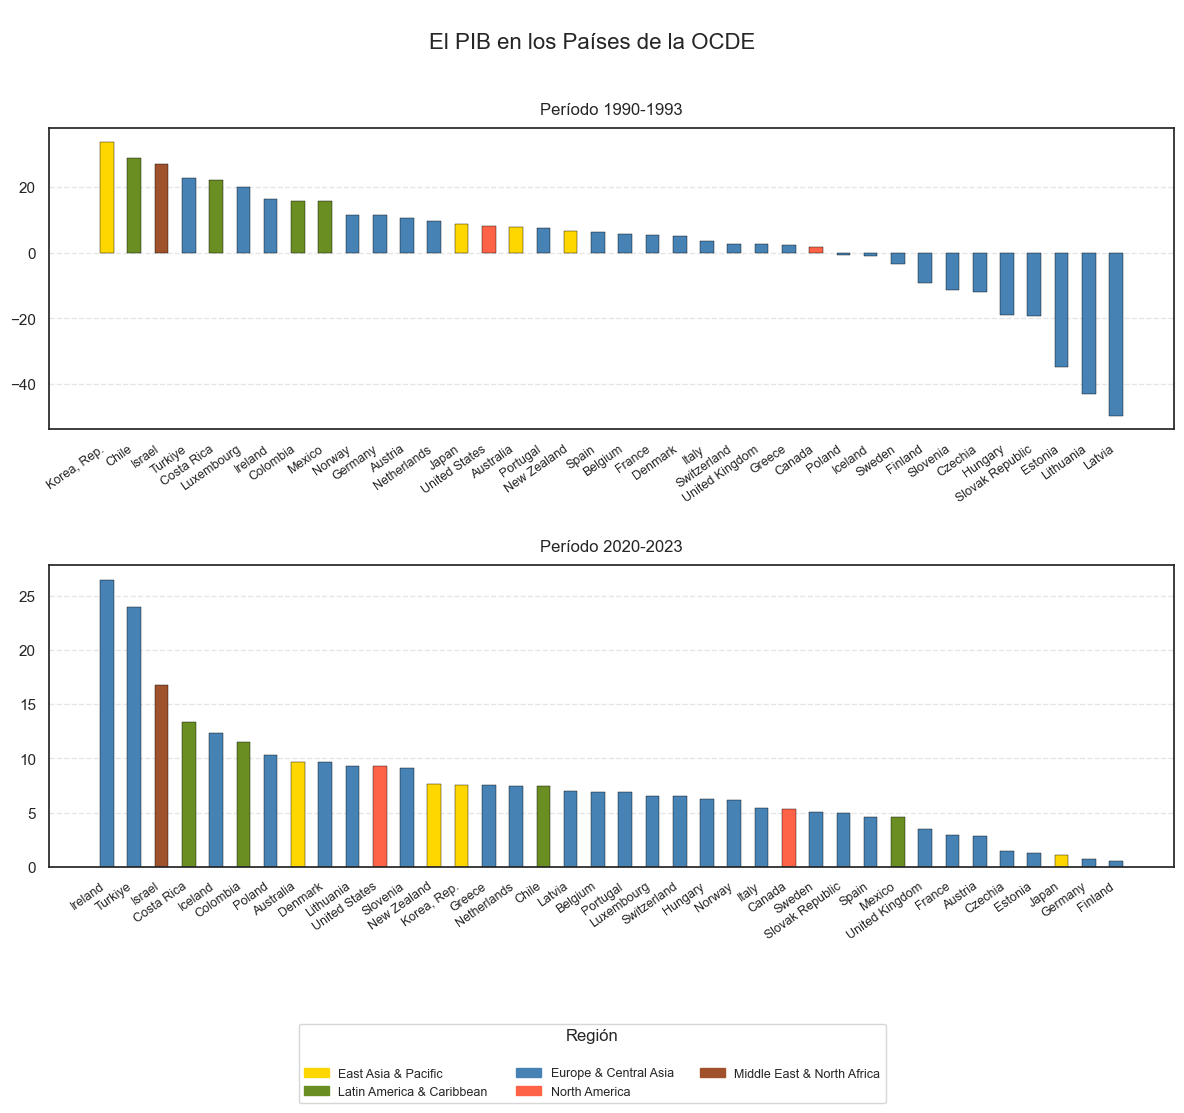

In [64]:
# --- Configuración de estilo ---
sns.set_theme(style="white")  # Fondo blanco para los gráficos

# --- Parámetros unificados ---
bar_width = 0.2
space_between_bars = 0.2
fontsize_labels = 9
fontsize_ticks = 9
rotation_xticks = 35

# --- Colores por región ---
color_por_region = {'East Asia & Pacific': 'gold', 'Latin America & Caribbean ': 'olivedrab',
    'Europe & Central Asia': 'steelblue', 'North America': 'tomato', 'Middle East & North Africa': 'sienna'}

# --- Función para graficar ---
def plot_growth(ax, df, x_positions, column, title, ranking_column=None):
    df_sorted = df.sort_values(column, ascending=False)
    bars = ax.bar(x_positions, df_sorted[column], width=bar_width, 
                 color=[color_por_region.get(region, 'gray') for region in df_sorted['region']],
                 edgecolor='black', linewidth=0.3)
    
    # Configurar etiquetas del eje X (países)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['country'], rotation=rotation_xticks, ha='right', fontsize=fontsize_ticks)
    
    # Añadir título y otros ajustes
    ax.set_title(title, fontsize=12, pad=10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)  # Grid detrás de las barras

# --- Figura y subplots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10))  # Aumenté un poco el alto para mejor visualización
fig.suptitle('\nEl PIB en los Países de la OCDE\n\n', fontsize=16, y=0.95)
plt.subplots_adjust(hspace=0.8, bottom=0.2)  # Más espacio en la parte inferior para los nombres

# Posiciones x comunes
x_positions = np.arange(len(df_90_completo['country'])) * (bar_width + space_between_bars)

# --- Generación de gráficos ---
plot_growth(axes[0], df_90_completo, x_positions, 'sum_1990_1993', '\nPeríodo 1990-1993')
plot_growth(axes[1], df_2020_completo, x_positions, 'sum_2020_2023', '\nPeríodo 2020-2023')

# --- Leyenda ---
handles = [Patch(color=color, label=region) for region, color in color_por_region.items()]
fig.legend(handles=handles, title='Región\n', loc='lower center',
    bbox_to_anchor=(0.5, -0.15),  # Ajustado para mejor posición
    ncol=3,  # Reducido a 3 columnas para mejor visualización
    fontsize=9)

plt.show()

<class 'pandas.core.frame.DataFrame'>


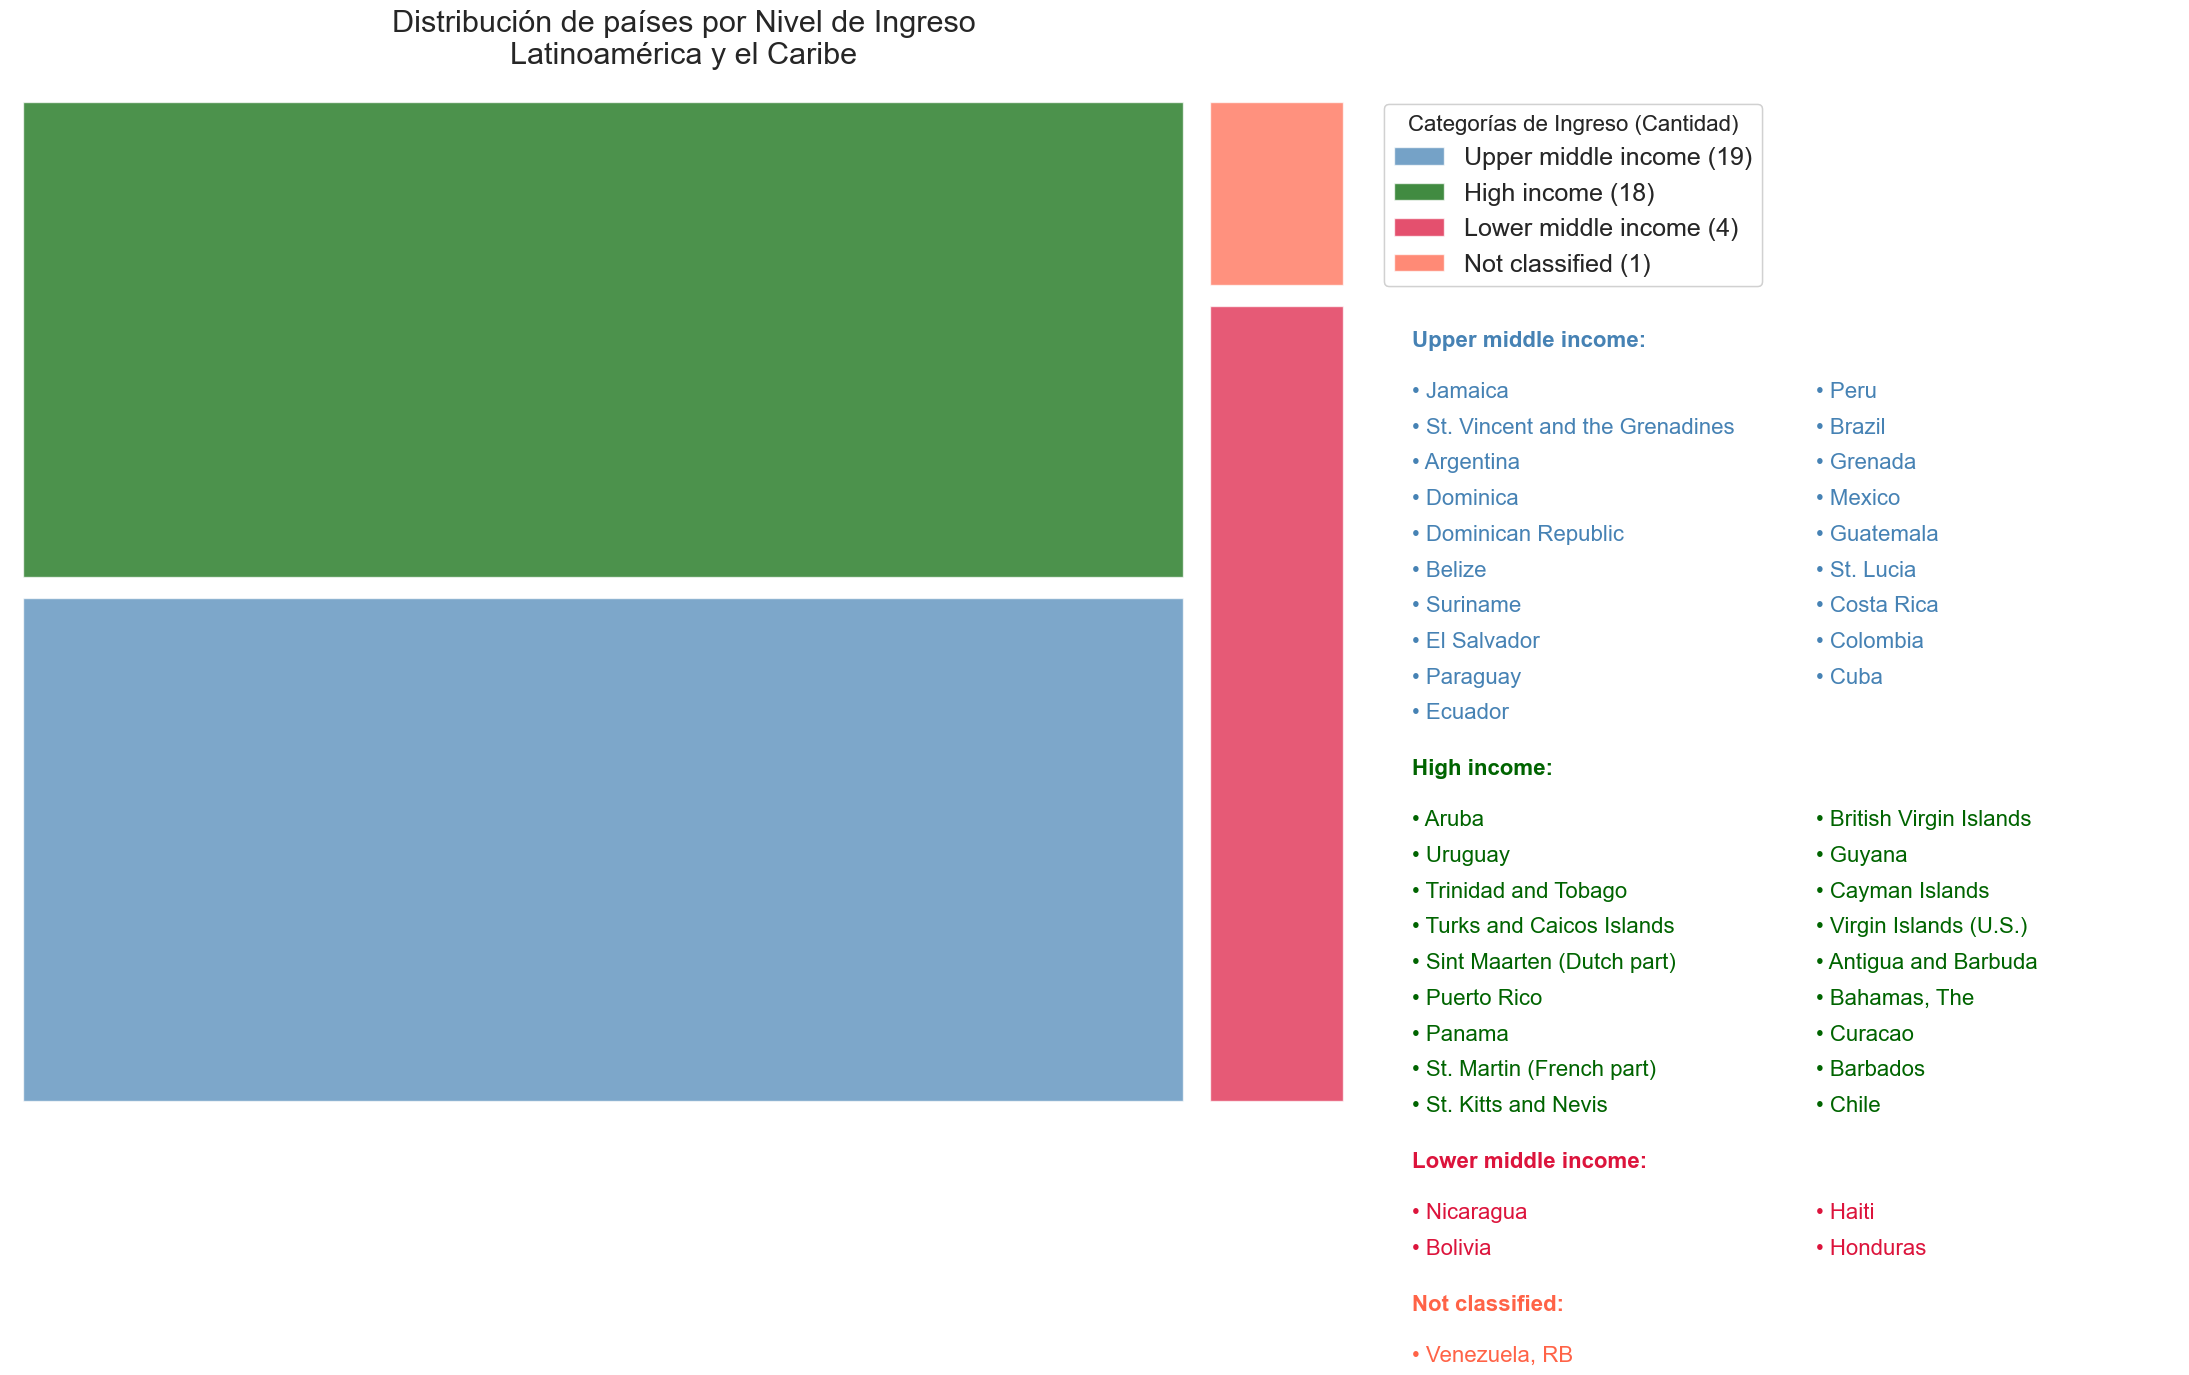

In [65]:
# 1. Configuración
plt.rcParams['font.size'] = 10
plt.rcParams['figure.autolayout'] = True

# 2. Obtener y preparar los datos del Banco Mundial
countries = wb.get_countries()
countries = pd.DataFrame(countries)  # Convertir a DataFrame por si acaso
countries.rename(columns={'name': 'country'}, inplace=True)  # Renombrar columna
print(type(countries))

# 3. Filtrar y procesar datos
latin_america = countries.loc[countries['region'] == 'Latin America & Caribbean '].copy()

# 4. Ordenar por nivel de ingreso
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Not classified']
latin_america.loc[:, 'incomeLevel'] = pd.Categorical(
    latin_america['incomeLevel'], 
    categories=income_order, 
    ordered=True)

latin_america = latin_america.sort_values('incomeLevel')

# 5. Preparar datos para el gráfico
income_groups = latin_america.groupby('incomeLevel', observed=True)['country'].apply(list).reset_index()
income_counts = latin_america['incomeLevel'].value_counts().reset_index()
plot_data = pd.merge(income_counts, income_groups, on='incomeLevel')

# 6. Configurar colores
custom_colors = ['steelblue', 'darkgreen', 'crimson', 'tomato']
colors = custom_colors[:len(plot_data)]

# 7. Crear figura
fig = plt.figure(figsize=(22, 14))  # Aumenté ligeramente el tamaño
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1.2])  # Ajusté el ratio para más espacio

# --- Treemap (sin etiquetas) ---
ax1 = fig.add_subplot(gs[0])
squarify.plot(sizes=plot_data['count'],
    label=None,  # Eliminamos las etiquetas del gráfico
    color=colors, alpha=0.7, pad=True)

# Añadir título descriptivo
ax1.set_title('Distribución de países por Nivel de Ingreso\nLatinoamérica y el Caribe', 
             fontsize=22, pad=20)
ax1.axis('off')

# --- Panel de información ---
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')

# Leyenda mejorada
legend_elements = [Patch(facecolor=colors[i], 
                        label=f"{plot_data['incomeLevel'][i]} ({plot_data['count'][i]})", 
                        alpha=0.7) 
                  for i in range(len(plot_data))]
leg1 = ax2.legend(handles=legend_elements, 
                 loc='upper left',
                 title="Categorías de Ingreso (Cantidad)",
                 title_fontsize=16,
                 fontsize=18,
                 frameon=True,
                 bbox_to_anchor=(0, 1))
ax2.add_artist(leg1)

# Lista de países mejor organizada
y_pos = 0.75  # Empezamos más abajo para dar espacio
col_width = 0.4  # Ancho de cada columna
col_gap = 0.1    # Espacio entre columnas

for idx, row in plot_data.iterrows():
    # Título de categoría
    ax2.text(0.05, y_pos, f"{row['incomeLevel']}:", 
            color=colors[idx], fontsize=16, weight='bold')
    y_pos -= 0.05
    
    # Dividir países en dos columnas
    countries = row['country']
    split_point = len(countries)//2 + len(countries)%2
    col1 = countries[:split_point]
    col2 = countries[split_point:]
    
    # Imprimir países en columnas paralelas
    max_lines = max(len(col1), len(col2))
    for i in range(max_lines):
        # Columna izquierda
        if i < len(col1):
            ax2.text(0.05, y_pos, f"• {col1[i]}", 
                    color=colors[idx], fontsize=16)
        
        # Columna derecha (con mayor separación)
        if i < len(col2):
            ax2.text(0.05 + col_width + col_gap, y_pos, f"• {col2[i]}", 
                    color=colors[idx], fontsize=16)
        
        y_pos -= 0.035
    
    y_pos -= 0.02  # Espacio adicional entre categorías

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

**Review of GDP in Latin and South American countries**

A database of countries in the region will be generated, but only for the year 2023. GDP growth for that year will be shown and compared with the average for OECD countries for that same year.

In [67]:
# Indicadores a explorar:
indicadores = {'crecimiento del PIB': 'NY.GDP.MKTP.KD.ZG',
               'PIB per capita': 'NY.GDP.PCAP.CD',
               'Indice de GINI': 'SI.POV.GINI', 
               'Pobreza total': 'SI.POV.NAHC'}

paises = ['BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'NIC', 'PAN', 'ATG', 'BHS', 
          'BRB', 'CUB', 'DMA', 'GRD', 'HTI', 'JAM', 'DOM', 'KNA', 'VCT', 
          'LCA', 'TTO', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 
          'PRY', 'PER', 'SUR', 'URY', 'VEN', 'PRI']

datos_ame = descargar_datos_wb(indicadores, paises, '2022', '2023')
datos_ame.to_excel('datos_america.xlsx')
datos_ame.info()

C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)
C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)
C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    264 non-null    object 
 1   year       264 non-null    object 
 2   valor      171 non-null    float64
 3   indicador  264 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.4+ KB


C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\1223811666.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=indicador, country=paises,start=inicio, end=fin)



Datos encontrados:
Crecimiento PIB: 32 registros
PIB per cápita: 31 registros
Índice GINI: 16 registros
Pobreza: 13 registros


C:\Users\Paula\AppData\Local\Temp\ipykernel_3712\765291543.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


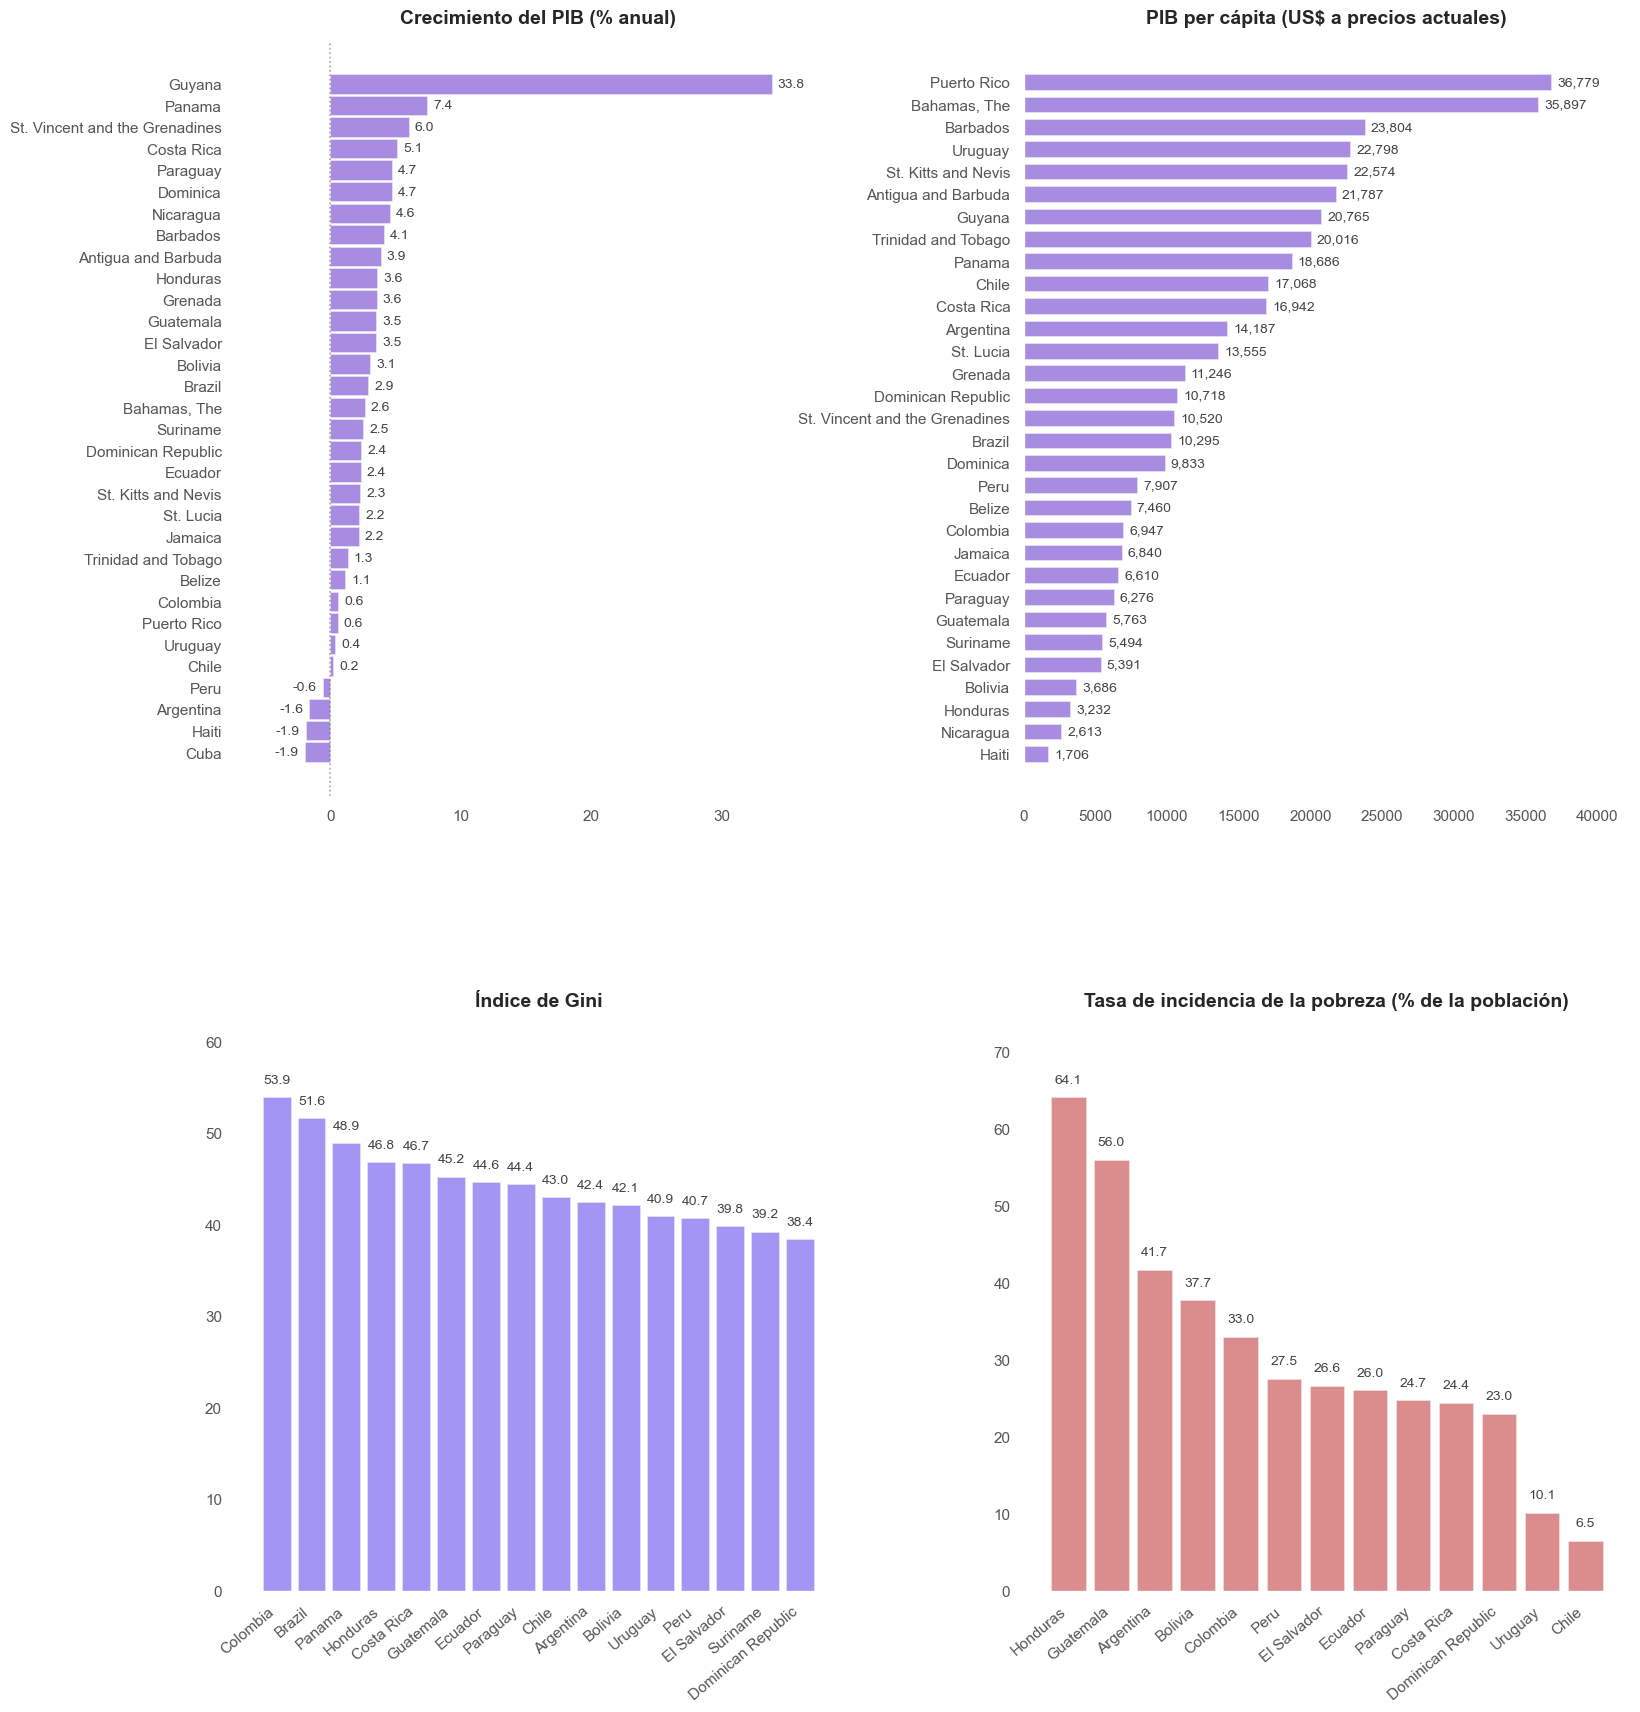

In [68]:
# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

# Diccionario ACTUALIZADO para coincidir con tus datos
indicadores = {
    'crecimiento del PIB': 'crecimiento del PIB',
    'PIB per capita': 'PIB per capita',
    'Indice de GINI': 'Indice de GINI',
    'Pobreza total': 'Pobreza total'
}

def preparar_datos(df, nombre_indicador):
    """Filtra por el nombre descriptivo del indicador"""
    df_filtrado = df[df['indicador'] == nombre_indicador].copy()
    df_filtrado = df_filtrado[np.isfinite(df_filtrado['valor'])].copy()
    
    if 'year' in df_filtrado.columns:
        df_filtrado = df_filtrado.sort_values('year').groupby('country').last().reset_index()
    
    return df_filtrado

# Preparación de datos (usando nombres descriptivos)
pib_amer_clean = preparar_datos(datos_ame, 'crecimiento del PIB')
percapita_clean = preparar_datos(datos_ame, 'PIB per capita')
gini_clean = preparar_datos(datos_ame, 'Indice de GINI')
pobreza_clean = preparar_datos(datos_ame, 'Pobreza total')

# Verificación
print("\nDatos encontrados:")
print(f"Crecimiento PIB: {len(pib_amer_clean)} registros")
print(f"PIB per cápita: {len(percapita_clean)} registros")
print(f"Índice GINI: {len(gini_clean)} registros")
print(f"Pobreza: {len(pobreza_clean)} registros")

# Configuración de figura
fig = plt.figure(figsize=(18, 28))
gs = fig.add_gridspec(3, 2, height_ratios=[4, 3, 2], hspace=0.4, wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])  # PIB
ax2 = fig.add_subplot(gs[0, 1])  # PIB per cápita
ax3 = fig.add_subplot(gs[1, 0])  # GINI
ax4 = fig.add_subplot(gs[1, 1])  # Pobreza

# Gráfico 1: Crecimiento PIB
if not pib_amer_clean.empty:
    pib_amer_clean = pib_amer_clean.sort_values('valor', ascending=True)
    bars1 = ax1.barh(pib_amer_clean['country'], pib_amer_clean['valor'], 
                    color='mediumpurple', height=0.9, alpha=0.8)
    
    # Configuración de ejes
    data_range = pib_amer_clean['valor'].max() - pib_amer_clean['valor'].min()
    x_pad = 0.15 * data_range
    ax1.set_xlim(pib_amer_clean['valor'].min() - x_pad, 
                pib_amer_clean['valor'].max() + x_pad)
    
    # Línea en cero si hay valores positivos y negativos
    if (pib_amer_clean['valor'] < 0).any() and (pib_amer_clean['valor'] > 0).any():
        ax1.axvline(0, color='gray', linestyle=':', linewidth=1.2, alpha=0.7)
    
    # Etiquetas de valores
    for bar in bars1:
        width = bar.get_width()
        pos = width + (0.01 if width >=0 else -0.01) * (ax1.get_xlim()[1] - ax1.get_xlim()[0])
        ax1.text(pos, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}',
                ha='left' if width >=0 else 'right', 
                va='center', 
                color='#444444',
                fontweight='normal')
else:
    ax1.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')

# Gráfico 2: PIB per cápita
if not percapita_clean.empty:
    percapita_clean = percapita_clean.sort_values('valor', ascending=True)
    bars2 = ax2.barh(percapita_clean['country'], percapita_clean['valor'],
                    color='mediumpurple', height=0.7, alpha=0.8)
    
    ax2.set_xlim(0, percapita_clean['valor'].max() * 1.15)
    
    for bar in bars2:
        width = bar.get_width()
        ax2.text(width + 0.01 * (ax2.get_xlim()[1] - ax2.get_xlim()[0]),
                bar.get_y() + bar.get_height()/2,
                f'{width:,.0f}',
                ha='left', va='center', color='#444444', fontweight='normal')

# Gráficos 3 y 4 (verticales)
for ax, data, color in zip([ax3, ax4], [gini_clean, pobreza_clean], ['mediumslateblue', 'indianred']):
    if not data.empty:
        data = data.sort_values('valor', ascending=False)
        bars = ax.bar(data['country'], data['valor'], color=color, alpha=0.7)
        ax.set_ylim(0, data['valor'].max() * 1.15)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.02 * ax.get_ylim()[1],
                    f'{height:.1f}',
                    ha='center', va='bottom', color='#444444', fontweight='normal')

# Configuración final de títulos
titles = [
    'Crecimiento del PIB (% anual)', 
    'PIB per cápita (US$ a precios actuales)', 
    'Índice de Gini', 
    'Tasa de incidencia de la pobreza (% de la población)'
]

for ax, title in zip([ax1, ax2, ax3, ax4], titles):
    ax.set_title(title, fontsize=14, pad=12, fontweight='bold')
    ax.grid(axis='x' if ax in [ax3, ax4] else 'y', linestyle=':', alpha=0.7)
    ax.set_facecolor('white')
    
    if ax in [ax3, ax4]:
        plt.setp(ax.get_xticklabels(), rotation=40, ha='right')

plt.tight_layout(pad=3.0)
plt.show()